Fibinacci Sequence in TensorFlow
------------------------------------

Fibonacci sequece is a series of numbers where a number is found by adding up the two numbers before it. Starting with 0 and 1, the sequence goes: 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, and so on. 

Each computed value in this series depends on previously computed values


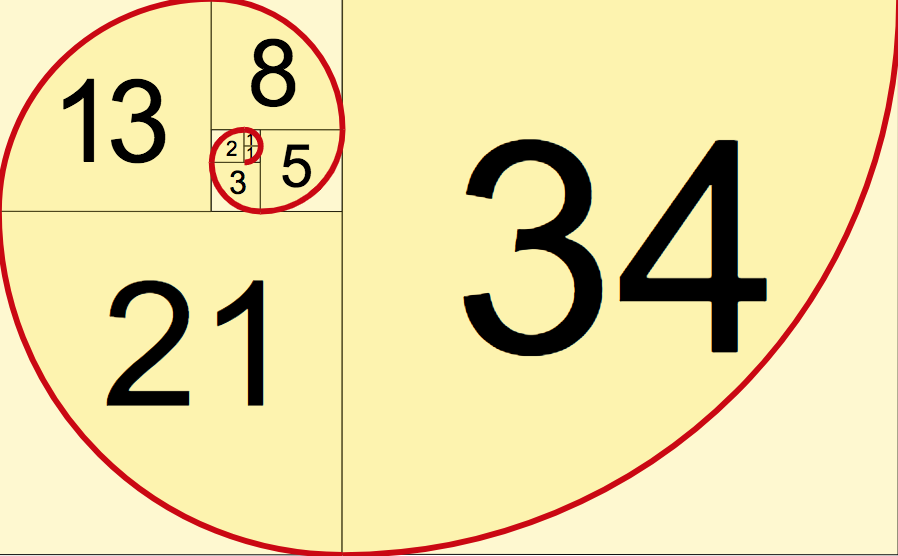

Our goal is to calculate the Fibonacci sequence using tensors, where 

fib(n)=fib(n−1)+fib(n−2), and 
fib(0)=0 and
fib(1)=1. 

In the next, first exercise we will use matrix multiplication. We will start with an initial vertical vector 
1 0

That vector represents the zero-th and the first Fibonacci numbers.

That vector is multiplied from the left by a 2x2 matrix:

1.0 1.0

1.0 0.0

This gives us a new vertical vector with  the first and the second Fibonacci number. 
1.0
1.0
Every subsequent multiplication by the matrix give us the next Fibonacci number, 
2.0
1.0

3.0
2.0
and so forth.

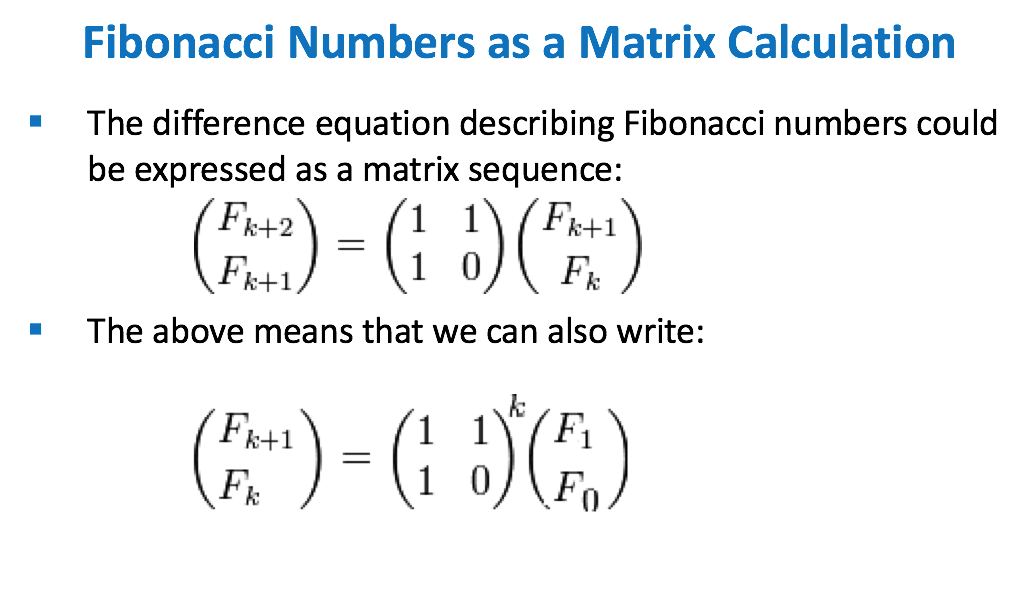


In [10]:
import tensorflow as tf

with tf.Graph().as_default() as g:

    # We want to calculate and output the Fibonacci sequence using TF. We will use tf.matmul() and
    # tf.assign() to perform the multiplications and assign the result
    # back to the variable fib_seq.

    fib_matrix = tf.constant([[1.0, 1.0],
                              [1.0, 0.0]],name='matrix')
    print (fib_matrix)

    # Initialize fib_seq to a 2x1 TensorFlow tensor *Variable* with 
    # the initial values of 1.0 and 0.0. 
    # Below, we make sure we specify a 2D tensor of shape 2x1, and
    # not a 1D tensor or a tensor of dimension 1X2. 
    # See fib_matrix above (a 2x2 2D tensor) 
    fib_sequence = tf.Variable([[1.0], [0.0]], name='fib_sequence')
    print (fib_sequence)
    # We need to multiply fib_matrix and fib_sequence using tf.matmul()
    next_fib = tf.matmul(fib_matrix, fib_sequence)
    
    # And assign the result back to fig_sequence using tf.assign()
    assign_op = tf.assign(fib_sequence, next_fib)    
    
    init = tf.global_variables_initializer()  # an operation, initializes all
    with tf.Session() as sess:
        sess.run(init)       # run init operation, initialize all
        print(sess.run(fib_sequence))  # show that the initial fib_sequence #this will print vector
        print(sess.run(fib_matrix))
        print('*****')                 # is a 2x1 matrix
        for step in range(30):
            sess.run(assign_op)
            print(sess.run(fib_sequence [0]))
            
    file_writer = tf.summary.FileWriter("fibonacci01", sess.graph)
    # file_writer.add_graph(sess.graph)
    file_writer.close()
    sess.close()

Tensor("matrix:0", shape=(2, 2), dtype=float32)
<tf.Variable 'fib_sequence:0' shape=(2, 1) dtype=float32_ref>
[[ 1.]
 [ 0.]]
[[ 1.  1.]
 [ 1.  0.]]
*****
[ 1.]
[ 2.]
[ 3.]
[ 5.]
[ 8.]
[ 13.]
[ 21.]
[ 34.]
[ 55.]
[ 89.]
[ 144.]
[ 233.]
[ 377.]
[ 610.]
[ 987.]
[ 1597.]
[ 2584.]
[ 4181.]
[ 6765.]
[ 10946.]
[ 17711.]
[ 28657.]
[ 46368.]
[ 75025.]
[ 121393.]
[ 196418.]
[ 317811.]
[ 514229.]
[ 832040.]
[ 1346269.]


The Fibonacci sequence could be calculated by direct calculation, i.e. a recursion, where we start with values:  fib(0)=0 and fib(1)=1, and repeatedly apply formula f(n) = f(n-1)+ f(n-2). The recursive relationship is naturaly expressed as a computational recursion or recursive function. 

In [11]:
# Pure Python
# define the recursive function fib() which invokes itself
def fib(n):                               
    if n <= 1:                       # once n reaches value of 1, we stop and
        return n                     # return fib(n=1) = 1, or fib(0)=0
    else:
        return(fib(n-1) + fib(n-2))  # in every internal invokation we reduce
                                     # n by 1 and 2 ; recursive because the function calls itself recursively for 
                                     # lower values of n 
                                    # every time the index is smaller and smaller till you get to 1. Then you get out of
                                    # this recursive function and the calculation is finished
# find Fibbinacci number with index nn
nn = 30
if nn <= 0:
    print("The input must be a positive integer")
else:
    print("Fibonacci sequence:")
    for y in range(30):    #start at 0 and go till 29; 30 not included
        print("Fibonacci(%d) = %d" % (y,(fib(y))))  #%d: d stands for decimal; tells print function that; y is anumber ranging from 0 to 29

exit()


Fibonacci sequence:
Fibonacci(0) = 0
Fibonacci(1) = 1
Fibonacci(2) = 1
Fibonacci(3) = 2
Fibonacci(4) = 3
Fibonacci(5) = 5
Fibonacci(6) = 8
Fibonacci(7) = 13
Fibonacci(8) = 21
Fibonacci(9) = 34
Fibonacci(10) = 55
Fibonacci(11) = 89
Fibonacci(12) = 144
Fibonacci(13) = 233
Fibonacci(14) = 377
Fibonacci(15) = 610
Fibonacci(16) = 987
Fibonacci(17) = 1597
Fibonacci(18) = 2584
Fibonacci(19) = 4181
Fibonacci(20) = 6765
Fibonacci(21) = 10946
Fibonacci(22) = 17711
Fibonacci(23) = 28657
Fibonacci(24) = 46368
Fibonacci(25) = 75025
Fibonacci(26) = 121393
Fibonacci(27) = 196418
Fibonacci(28) = 317811
Fibonacci(29) = 514229


Let us do the same in TensorFlow

In [1]:
import tensorflow as tf

#create variables to compute Fibonacci sequence; Fn_2 is Fibonacci (n-2), and Fn_1 is Fibonacci (n-1), 
#and so Fn is Fibonacci (n)
#add Fn_2 and Fn_1 to get Fn
Fn_2=tf.Variable(0, name='Fn_2')
Fn_1=tf.Variable(1, name = 'Fn_1')
temp=tf.Variable(0, name='temp')
Fn = tf.Variable(0,name='Fn')
Fn = tf.add(Fn_2,Fn_1)

#Constantly moving up: what was Fn in the last iteration, becomes Fn_1, and so on

#create tensors
update1=tf.assign(temp,Fn)
update2=tf.assign(Fn_2,Fn_1)
update3=tf.assign(Fn_1,temp)

#run session and print 30 numbers 
init = tf.global_variables_initializer()  #tensorflow assigns values; we execute this operation init when we open session
#this is all just painting of the graph of the operations we will execute
with tf.Session() as sess:
    sess.run(init)
    #We tell Session to execute init
    #Now we do the loop from 0 to 29, and print a; step is integer
    for step in range(30):
        print('Fibonacci('+str(step)+')= '+ str(sess.run(Fn_2)))   #adding string version of previously calculated Fn_2
        sess.run(update1)  #see above: what ever was in Fn (the most recently calculated value) will be put in temp
        sess.run(update2)  #whatever was in Fn_1 is pushed into Fn_2; whatever was in temp becomes Fn_1, so it's ready to 
        sess.run(update3)                    #calculate Fn
        #we always print the lowest Fibonacci we have -- Fn_2

#create graph        
file_writer = tf.summary.FileWriter("fibonacci02", sess.graph)
file_writer.add_graph(sess.graph)
file_writer.close() 
sess.close()
          
#to see graph, we run on Command Prompt tensorboard --logdir fibonacci02

Fibonacci(0)= 0
Fibonacci(1)= 1
Fibonacci(2)= 1
Fibonacci(3)= 2
Fibonacci(4)= 3
Fibonacci(5)= 5
Fibonacci(6)= 8
Fibonacci(7)= 13
Fibonacci(8)= 21
Fibonacci(9)= 34
Fibonacci(10)= 55
Fibonacci(11)= 89
Fibonacci(12)= 144
Fibonacci(13)= 233
Fibonacci(14)= 377
Fibonacci(15)= 610
Fibonacci(16)= 987
Fibonacci(17)= 1597
Fibonacci(18)= 2584
Fibonacci(19)= 4181
Fibonacci(20)= 6765
Fibonacci(21)= 10946
Fibonacci(22)= 17711
Fibonacci(23)= 28657
Fibonacci(24)= 46368
Fibonacci(25)= 75025
Fibonacci(26)= 121393
Fibonacci(27)= 196418
Fibonacci(28)= 317811
Fibonacci(29)= 514229
